In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.model_selection import train_test_split

In [2]:
# reading data and combining all sheets into one data frame
all_sheets = pd.read_excel("Copy of Folds5x2_pp.xlsx", sheet_name=None)
sheet_names = list(all_sheets.keys())
DF = []
for sheet in all_sheets.items():
    DF.append(sheet[1])

DF = pd.concat(DF, ignore_index=True)
print("DataFrame shape:", DF.shape)

DataFrame shape: (47840, 5)


In [3]:
y = DF['PE']
median  = np.median(y)
mad = np.median(np.abs(y - median))
print("MAD:", mad)

MAD: 13.870000000000061


In [4]:
ransac = RANSACRegressor(
    estimator = LinearRegression(),
    min_samples=5,
    residual_threshold=13.87,
    max_trials=100)

In [5]:
x = DF[['AT', 'V', 'AP', 'RH']]
y = DF['PE']

ransac.fit(x, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(ransac.inlier_mask_)

print("Inliers:", np.sum(inlier_mask))
print("Outliers:", np.sum(outlier_mask))

Inliers: 46130
Outliers: 1710


In [6]:
cleanDF = DF[inlier_mask]
print("Cleaned DataFrame shape:", cleanDF.shape)

Cleaned DataFrame shape: (46130, 5)


In [7]:
x_clean = cleanDF[['AT', 'V', 'AP', 'RH']]
y_clean = cleanDF['PE']

x_train, x_test, y_train, y_test = train_test_split(x_clean, y_clean, test_size=0.2, random_state=42)

print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)

Training set shape: (36904, 4) (36904,)
Test set shape: (9226, 4) (9226,)


In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
print("Coefficients:", model.coef_)

# Print the intercept
print("Intercept:", model.intercept_)

Coefficients: [-2.02528641 -0.23147165  0.02110749 -0.14082601]
Intercept: 495.67315691698036


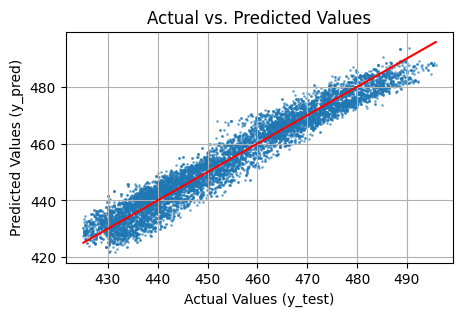

In [17]:
y_pred = model.predict(x_test)

plt.figure(figsize=(5,3))
plt.scatter(y_test, y_pred, alpha=0.5, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()